## **Face Mask Detection- Classification Project**

**Group Info:**


*   Gargi Asthana      - BS20DMU002
*   Prakruti Makwana   - BS20DMU001
*   Devashish Upadhyay - BS20DMU006





# **INTRODUCTION**
*Masks play a crucial role in protecting the health of individuals against respiratory diseases, as is one of the few precautions available for COVID-19 in the absence of immunization.*



# **Outline**
1. About the dataset
2.Problem Approach
3.Data Processing
4.Splitting Data set
5. Models
  *  Baseline Model
  *  Support Vector Machine
  *  XG Boost
  *  Random Forest
6. Model Comparison
7. Model Selection and Prediction
8. Conclusion

## **About the dataset**

Source: https://www.kaggle.com/omkargurav/face-mask-dataset

This dataset consists of 7553 images belonging to two classes:

*   with_mask: 3725 images
*   without_mask: 3828 images





## **Problem Approach** 
Our objective is to build a machine learning model which predicts whether a person has worn a mask or not. 
To solve the problem we inspect the data, process it and clean it.
We split the data into training and test sets, apply machine learning algorithms (Support Vector Machine, XG Boost and Random Forest). Using cross validation, we then compared the models based on run time and accuracy and found the best model.

# *PLEASE CHANGE THE 'PATHS' OF THE PICKLE FILES AND MODELS ACCORDINGLY WITH ENVIRONMENT (MAC/WINDOWS).*
 THE PATHS DON'T REQUIRED TO BE CHANGED IF USED WITH COLLAB NOTEBOOK.
 NOTEBOOK LINK : https://colab.research.google.com/drive/1u0N5vVsDWYr_0HCvzKMnlftMaPAqXQ4G?usp=sharing#scrollTo=0iNrDOglkJv6

# **Git clone**

Made a git repository for all the model and pickle files dumped at the time of training models. These are being pulled.

In [ ]:
!git clone https://github.com/gargiasth/Mask-Recognition.git

fatal: destination path 'Mask-Recognition' already exists and is not an empty directory.


# **Data Processing**

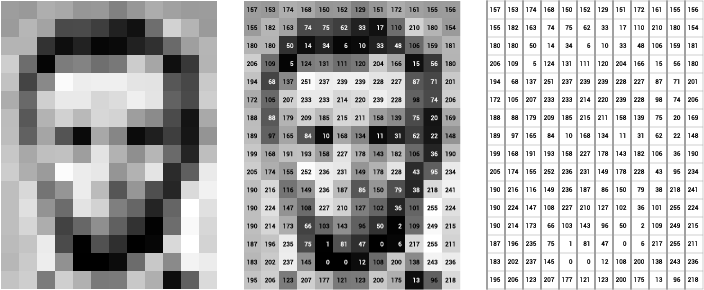

In [ ]:
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import cv2  #used for image processing
import pickle #used to store 
import matplotlib.pyplot as plt
import random
import time

# Processing the data

In [ ]:
catagories = ['with_mask','without_mask']


In [ ]:
#processing images from dataset and labeling them as 0 for mask and 1 for without mask
data = []
n = 50  #resizing the images to attain a uniform size which will decrease the run time and improve accuracy

#for with mask images
with_mask = '/content/Mask-Recognition/with_mask'
label = 0

for i in os.listdir(with_mask):
    imgpath = os.path.join(with_mask,i) #specifying the path to join images
    pet_img = cv2.imread(imgpath,0) #reading the image as black n white
    try:    
        pet_img = cv2.resize(pet_img,(n,n)) #resizeing to (50,50)
        image = np.array(pet_img).flatten()#converting 2d to 1d no. line, so it returns an array
        data.append([image,label])  #appending the updated images to their respective directories
    except:
        pass                               #images less than the specified size will not be included 

#for without mask images
without_mask = '/content/Mask-Recognition/without_mask'
label = 1

for i in os.listdir(without_mask):
    imgpath = os.path.join(without_mask,i)
    pet_img = cv2.imread(imgpath,0)
    try:    
        pet_img = cv2.resize(pet_img,(n,n))
        image = np.array(pet_img).flatten()
        data.append([image,label])
    except:
        pass

print("Length of data: ",len(data))

Length of data:  7553


**Loading Pre-proccesed Pickle File**

# **Train-Test-Split**

In [ ]:
#seprating X and y
random.shuffle(data)

features = []
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)
features = np.array(features)
labels = np.array(labels)
#spliting data into training and test sets
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.25)

# **BASELINE MODEL**

DummyClassifier is a classifier that makes predictions using simple rules.

This classifier is useful as a simple baseline to compare with other (real) classifiers. Do not use it for real problems.



In [ ]:
from sklearn.dummy import DummyClassifier

#creating dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent") #always predicts the most frequent label in the training set.

#training model
dummy_clf.fit(xtrain,ytrain)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [ ]:
dummy_clf.score(xtrain,ytrain)

0.5107697740112994

# **1. SUPPORT VECTOR MACHINE**

The goal of the SVM algorithm is to create the best line or decision boundary called hyperplane that can segregate n-dimensional space into classes. 

SVM chooses the extreme points/support vectors that help in creating the hyperplane.

In [ ]:
# using support vector classifier
svm = SVC()
svm_start = time.time()
#training model
svm.fit(xtrain,ytrain)
svm_end = time.time()


In [ ]:
#Saving Model
svm = pickle.load(open('/content/Mask-Recognition/Models/SVM(50,50).sav','rb'))
svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

without_mask


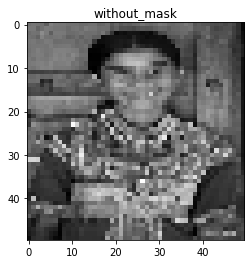

Accuracy of svm:  0.9057702488088936


In [ ]:
#prediction
imgnum1 = 71
svm_pred_start = time.time()
prediction1 = svm.predict(xtest)
svm_pred_end = time.time()
print(catagories[prediction1[imgnum1]])


pict1  = xtest[imgnum1].reshape(50,50)
plt.title(str(catagories[prediction1[imgnum1]]))
plt.imshow(pict1,cmap='gray')   #plotting the image
plt.show()

accuracy1 = svm.score(xtest,ytest)
print("Accuracy of svm: ",accuracy1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,svm.predict(xtest)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       954
           1       0.88      0.93      0.91       935

    accuracy                           0.91      1889
   macro avg       0.91      0.91      0.91      1889
weighted avg       0.91      0.91      0.91      1889



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

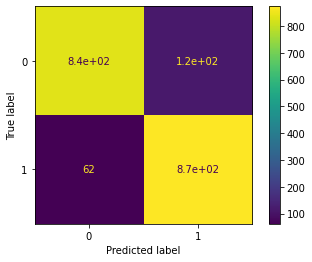

In [ ]:
plot_confusion_matrix(svm, xtest, ytest)
plt.show()

# **2. XGBOOST**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# using xgboost classifier
xgb_start = time.time()
xgb = XGBClassifier()
#training model
xgb.fit(xtrain,ytrain)
xgb_end = time.time()


In [ ]:
xgb = pickle.load(open('/content/Mask-Recognition/Models/Xgboost(50,50).sav','rb'))

In [ ]:
#Saving Model
pick = open('Xgboost(50,50).sav','wb')
pickle.dump(xgb,pick)
pick.close()

without_mask


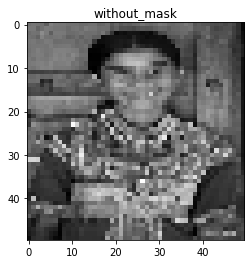

Accuracy of xgb:  0.8967707781895182


In [ ]:
#prediction
imgnum2= 71
xgb_pred_start = time.time()
prediction2 = xgb.predict(xtest)
xgb_pred_end = time.time()
print(catagories[prediction2[imgnum2]])


pict2  = xtest[imgnum2].reshape(50,50)
plt.title(str(catagories[prediction2[imgnum2]]))
plt.imshow(pict2,cmap='gray')
plt.show()

accuracy2 = xgb.score(xtest,ytest)
print("Accuracy of xgb: ",accuracy2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,xgb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       954
           1       0.87      0.93      0.90       935

    accuracy                           0.90      1889
   macro avg       0.90      0.90      0.90      1889
weighted avg       0.90      0.90      0.90      1889



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

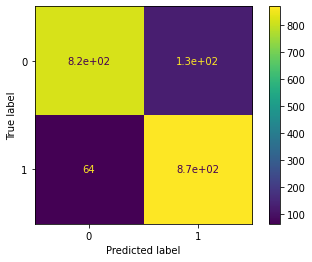

In [ ]:
plot_confusion_matrix(xgb, xtest, ytest)
plt.show()

# **3. Random Forest**

Random Forest is a supervised learning algorithm. It builds multiple decision trees and merges them together to get a more accurate and stable prediction. 
This algorithm can be used for both classification and regression problems.

It adds additonal randomness to the model while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features which results in a better model. Decision Trees tend to overfit the model, hence Random forest is oreferred over it.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# using regression classifier
rf = RandomForestClassifier()
rf_start = time.time()
#training model
rf.fit(xtrain,ytrain)
rf_end = time.time()

In [ ]:
#Saving Model
pick = open('RF(50,50).sav','wb')
pickle.dump(rf,pick)
pick.close()

without_mask


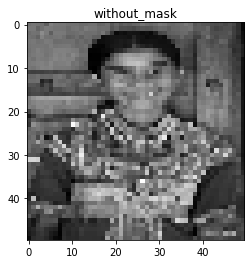

Accuracy:  0.8422445738485972


In [ ]:
#prediction
imgnum3 = 71
rf_pred_start = time.time()
prediction3 = rf.predict(xtest)
rf_pred_end = time.time()
print(catagories[prediction3[imgnum3]])


pict3  = xtest[imgnum3].reshape(50,50)
plt.title(str(catagories[prediction3[imgnum3]]))   
plt.imshow(pict3,cmap='gray')     #plotting the image
plt.show()

accuracy3 = rf.score(xtest,ytest)
print("Accuracy: ",accuracy3)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

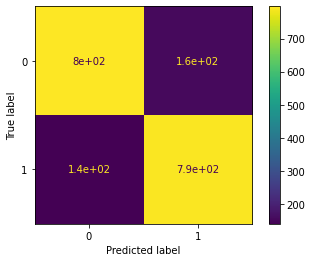

In [ ]:
plot_confusion_matrix(rf, xtest, ytest)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       954
           1       0.83      0.85      0.84       935

    accuracy                           0.84      1889
   macro avg       0.84      0.84      0.84      1889
weighted avg       0.84      0.84      0.84      1889



# **Model Comparisions**

In [ ]:
models = []
models.append(('Xgb',XGBClassifier()))
models.append(('rf',RandomForestClassifier()))
models.append(('SVM',SVC()))
results =[]
names = []

In [ ]:
#this takes around 20 mins to run....so we added a photo of the same
from sklearn import model_selection
for name,model in models:
    kfold=model_selection.KFold(n_splits=10)
    cv_results=model_selection.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std()) # finds out the mean and std deviation for each model to compare thier accuracy
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Xgb:0.839158(0.014714)
rf:0.846045(0.012881)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM:0.824857(0.013782)


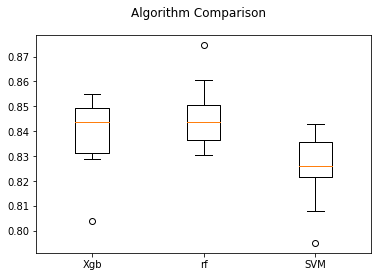

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison') #adding a centred title to the figure
ax = fig.add_subplot(111)   
plt.boxplot(results)
ax.set_xticklabels(names)  # names of training models on x axis
plt.show()

In [ ]:
print('SVM train time = ',svm_end-svm_start)
print('xgb train time = ',xgb_end-xgb_start)
print('rf train time = ',rf_end-rf_start)
print('SVM pred time = ',svm_pred_end-svm_pred_start)
print('xgb pred time = ',xgb_pred_end-xgb_pred_start)
print('rf pred time = ',rf_pred_end-rf_pred_start)

SVM train time =  69.40045428276062
xgb train time =  42.90389657020569
rf train time =  18.721099853515625
SVM pred time =  21.97613286972046
xgb pred time =  0.05108451843261719
rf pred time =  0.10126757621765137


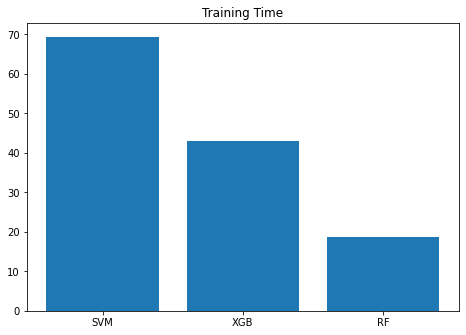

Minimum Training Time =  18.721099853515625


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Training Time')
langs = ['SVM', 'XGB', 'RF']
training_time = [svm_end-svm_start,xgb_end-xgb_start,rf_end-rf_start]
ax.bar(langs,training_time)
plt.show()
print('Minimum Training Time = ',min(training_time))

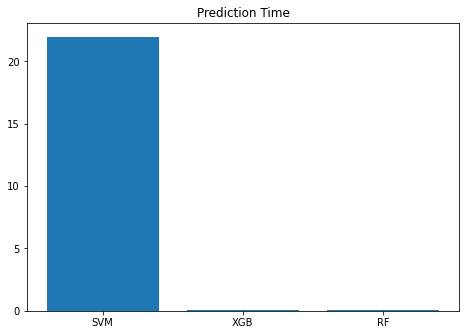

Minimum Predition time =  0.05108451843261719


In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
langs1 = ['SVM', 'XGB', 'RF']
ax1.set_title('Prediction Time')
pred_time = [svm_pred_end-svm_pred_start,xgb_pred_end-xgb_pred_start,rf_pred_end-rf_pred_start]
ax1.bar(langs1,pred_time)
plt.show()
print('Minimum Predition time = ',min(pred_time))

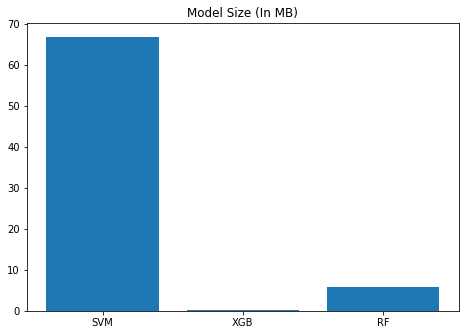

Minimum Model Size =  0.104


In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
langs2 = ['SVM', 'XGB', 'RF']
ax2.set_title('Model Size (In MB)')
model_size = [66.9,0.104,5.8]
ax2.bar(langs2,model_size)
plt.show()
print('Minimum Model Size = ',min(model_size))

# **Model Selection and Predictions**

For Choosing the best model out the SVM, XGB and RF, we have taken the following parameters into consideration:


1.   Accuracies
2.   Training time
3.   Prediction time
4.   Model size



In real life application, These models is to be used with a computer vision application which takes more computer resources and requires lesser prediction times.

So by taking that into consideration, we have chosen XGboost Model.

In [ ]:
model = pickle.load(open('/content/Mask-Recognition/Models/Xgboost(50,50).sav','rb'))
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print('XGboost Model Score = ',model.score(xtest,ytest))
print('XGboost Training Time =',xgb_end-xgb_start)
print('XGboost Prediction Time = ',xgb_pred_end-xgb_pred_start)
print('XGboost Model Size = ',104,'KB')

XGboost Model Score =  0.8893594494441504
XGboost Training Time = 41.3600754737854
XGboost Prediction Time =  0.04919576644897461
XGboost Model Size =  104 KB


Now, Lets predict an image out of our dataset.

In [ ]:
from PIL import Image
image1 = Image.open('/content/Mask-Recognition/devashish1.jpg')
import matplotlib.pyplot as  plt

In [ ]:
data =[]
img = cv2.imread('/content/Mask-Recognition/devashish1.jpg',0)
img = cv2.resize(img,(50,50))
image = np.array(img).flatten()
data.append([image])
prediction = model.predict(data[0])
catagory = ['with_mask','without_mask']
print(catagory[prediction[0]])

with_mask


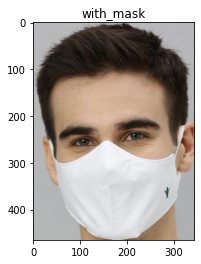

In [ ]:
plt.title(catagory[prediction[0]])
plt.imshow(image1)

After testing the datasets with the 3 models, we can conclude that Random Forest and XG boost perform better than Support Vector Machine. The runtime for support vector machine was too high which proves to be inefficient for the prediction. XG Boost shows higher accuracy as compared to Random Forest and also takes up less space which makes it easier to reload.

Hence, we can say that XG Boost is the best model out of all.